# 1. Бизнес-анализ

## 1.1. Цель

Спрогнозировать оценку качества для вина по физико-химическим показателям.

## 1.2. Описание

Набор данных относится к красному и белому вариантам португальского вина "Винью Верде". Из-за проблем конфиденциальности и логистики доступны только физико-химические (входные данные) и сенсорные (выходные данные) переменные (например, нет данных о типах винограда, марке вина, цене продажи вина и т. д.).
Набор данных можно рассматривать как задачу классификации или регрессии. Классы упорядочены и не сбалансированы. Для обнаружения нескольких превосходных или плохих вин можно было бы использовать более сложные алгоритмы обнаружения выбросов. Кроме того, мы не уверены, что все входные переменные релевантны. Поэтому было бы интересно протестировать методы выбора функций.

# 2. Анализ данных

## 2.1. Подключение библиотек

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier

## 2.2. Сбор данных

In [41]:
# загружаем данные
full_df = pd.read_csv('winequalityN.csv')
full_df.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


## 2.3. Описание данных

Входящие переменные (на основе физико-химических свойств):

1-фиксированная кислотность

2-Летучая кислотность

3-лимонная кислота

4-остаточный сахар

5-хлориды

6-свободный диоксид серы

7-общий диоксид серы

8-Плотность

9-рН

10-сульфаты

11-алкоголь

Выходная переменная (на основе сенсорных данных):

12-качество (оценка от 0 до 10 баллов)

## 2.4. Проверка качества и изучение данных

### 2.4.1. Статистика и общая информация

Смотрим статистическую информацию

In [7]:
full_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Смотрим общую информацию по датасету, типы данных

In [8]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


Определяем качество данных, насколько данные заполнены

In [42]:
full_df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

### 2.4.2. Матрица корреляций

Строим матрицу корреляций, смотрим взаимосвязи между переменными

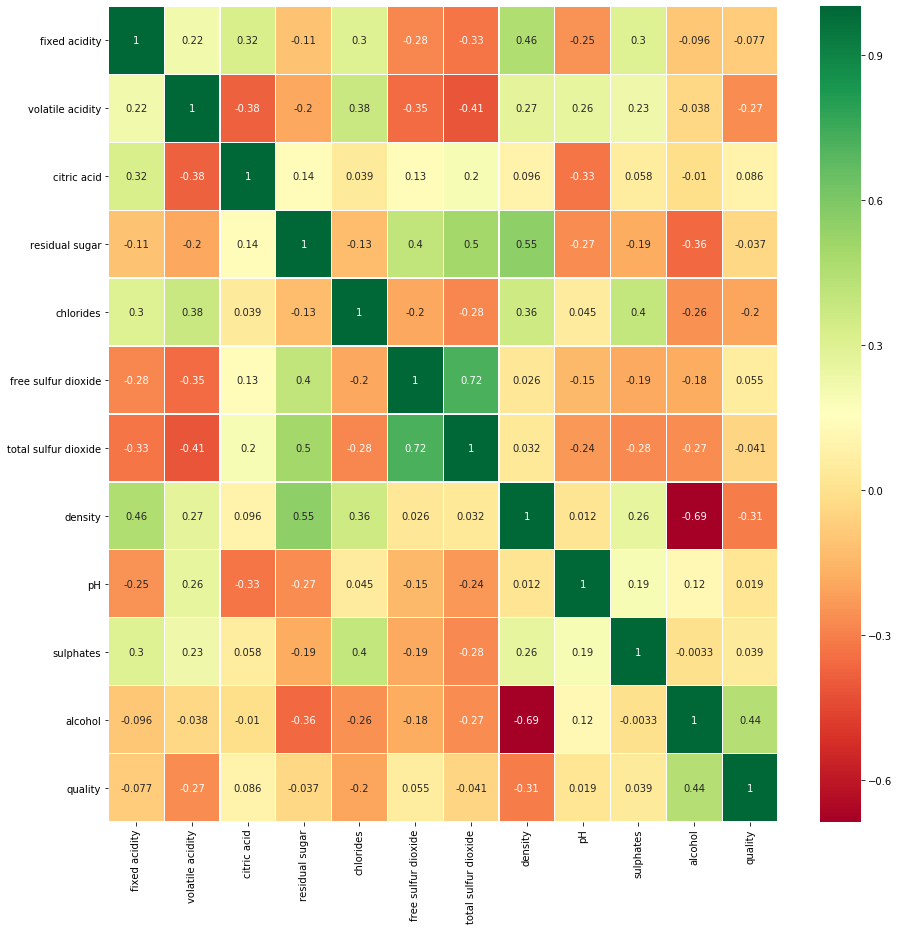

In [43]:
# матрица корреляций
sns.heatmap(full_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

### 2.4.3. Гистограммы распределений

Оцениваем типы распределений переменных

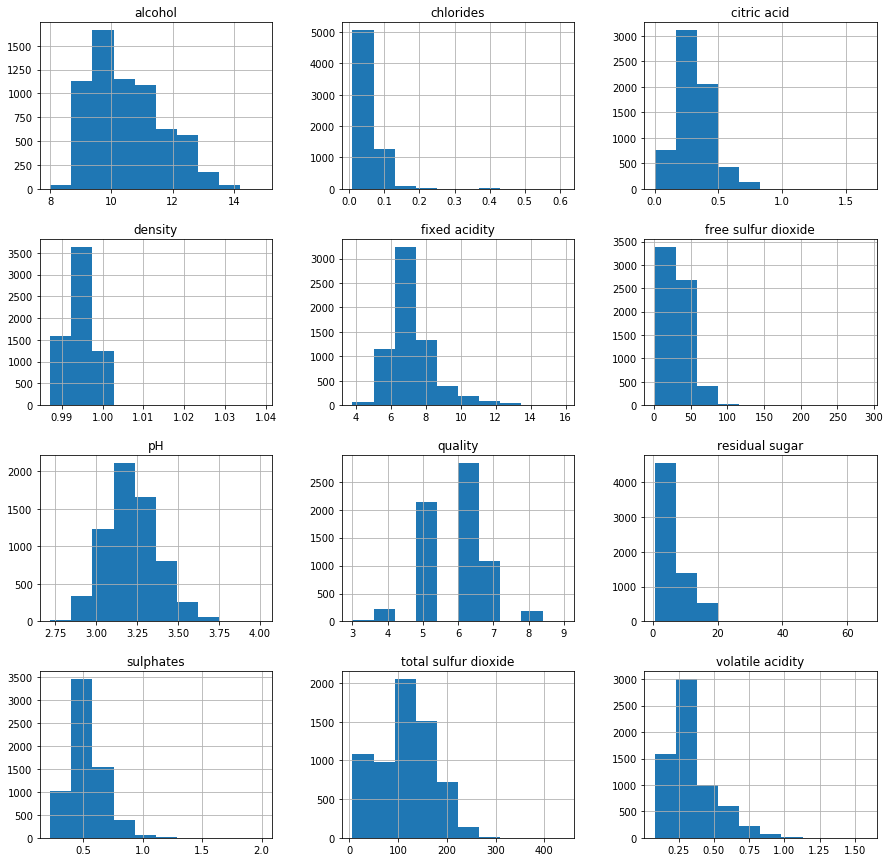

In [44]:
full_df.hist(figsize=(15,15))
plt.show()

# 3. Подготовка данных

## 3.1. Преобразование категориальной переменной

Единственную категориальную переменную заменяем числовыми значениями с помощью One Hot Encoding

In [45]:
dummies=pd.get_dummies(full_df['type'])
full_df=pd.concat([dummies,full_df],axis=1)

full_df = full_df.drop('type', 1)

## 3.2. Заполнение пропущенных значений

Пропущенные значения (их мало) заменяем средними

In [46]:
full_df=full_df.apply(lambda x: x.fillna(x.mean(),axis=0))
full_df.isna().sum()

red                     0
white                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# 4. Моделирование

## 4.1. Разделение данных

Данные разделяем на тренировочные и тестовые и масштабируем

In [31]:
full_df.columns

Index(['red', 'white', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [35]:
X = full_df[['red', 'white', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = full_df.quality

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [47]:
# приводим данные к одному масштабу
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# возвращаем к типу датафрейма
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

## 4.2. Обучение моделей

Обучаем модель логистической регрессии, как базовую модель

In [48]:
lr = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

C:\Users\Win10Pro\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=40, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Обучим дополнительно модель случайный лес

In [51]:
forest=RandomForestClassifier(criterion='entropy', n_estimators=50, max_depth=5, min_samples_leaf=5)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## 4.3. Оценка моделей

Оценим модель логистической регрессии

In [49]:
lr_predict = lr.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.50      0.08      0.13        39
           5       0.60      0.57      0.59       429
           6       0.50      0.72      0.59       555
           7       0.52      0.18      0.27       227
           8       0.00      0.00      0.00        42
           9       0.00      0.00      0.00         2

    accuracy                           0.53      1300
   macro avg       0.30      0.22      0.23      1300
weighted avg       0.52      0.53      0.50      1300



C:\Users\Win10Pro\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Оценим Случайный лес

In [52]:
forest_predict = forest.predict(X_test)
print(classification_report(y_test, forest_predict))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        39
           5       0.64      0.59      0.61       429
           6       0.50      0.78      0.61       555
           7       0.58      0.09      0.16       227
           8       0.00      0.00      0.00        42
           9       0.00      0.00      0.00         2

    accuracy                           0.55      1300
   macro avg       0.25      0.21      0.20      1300
weighted avg       0.53      0.55      0.49      1300



C:\Users\Win10Pro\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 5. Оценка решения

Обе модели показали не слишком высокие результаты, необходимо вернуться на шаг Анализа данных и выявить (сгенерировать) более значимые признаки.